In [1]:
import pandas as pd
import numpy as np
import unidecode
import matplotlib as mpl
from adjustText import adjust_text
import matplotlib.pyplot as plt

In [2]:
background = '#D7E5E5'
mpl.rcParams['font.family']= 'Candara'
mpl.rcParams['font.size'] = 12
mpl.rcParams['font.weight'] = 'bold'
mpl.rcParams['legend.title_fontsize'] = 15
mpl.rcParams['legend.fontsize'] = 12
mpl.rcParams['savefig.facecolor']='white'
mpl.rcParams['axes.titleweight'] = 'heavy'
mpl.rcParams['axes.labelweight'] = 'heavy'

In [3]:
url_defence = 'https://fbref.com/en/comps/Big5/defense/players/Big-5-European-Leagues-Stats'
url_passing = 'https://fbref.com/en/comps/Big5/passing/players/Big-5-European-Leagues-Stats'
url_shooting = 'https://fbref.com/en/comps/Big5/shooting/players/Big-5-European-Leagues-Stats'

In [4]:
data_defence = pd.read_html(url_defence, header=1)[0]
data_defence = data_defence[data_defence['Player'] != 'Player']
data_defence = data_defence.drop(columns=['Rk', 'Matches'])
data_defence

,Player,Nation,Pos,Squad,Comp,Age,Born,90s,Tkl,TklW,...,Mid 3rd.1,Att 3rd.1,Blocks,Sh,ShSv,Pass,Int,Tkl+Int,Clr,Err
0,Max Aarons,eng ENG,DF,Norwich City,eng Premier League,22-055,2000,24.6,57,33,...,96,27,71,15,0,56,40,97,53,0
1,Yunis Abdelhamid,ma MAR,DF,Reims,fr Ligue 1,34-153,1987,22.1,38,29,...,111,17,44,18,1,26,76,114,74,0
2,Salis Abdul Samed,gh GHA,MF,Clermont Foot,fr Ligue 1,21-339,2000,22.1,43,27,...,256,65,23,1,0,22,41,84,14,0
3,Laurent Abergel,fr FRA,MF,Lorient,fr Ligue 1,29-027,1993,22.2,75,45,...,320,72,37,1,0,36,54,129,11,0
4,Charles Abi,fr FRA,FW,Saint-Étienne,fr Ligue 1,21-322,2000,0.5,0,0,...,11,3,1,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2884,Martín Zubimendi,es ESP,MF,Real Sociedad,es La Liga,23-026,1999,17.5,39,19,...,117,35,22,8,0,14,27,66,37,0
2886,Szymon Żurkowski,pl POL,MF,Empoli,it Serie A,24-156,1997,16.8,40,29,...,132,84,32,5,0,27,35,75,20,2
2887,Martin Ødegaard,no NOR,MF,Arsenal,eng Premier League,23-073,1998,17.3,23,12,...,126,122,10,1,0,9,10,33,8,1
2888,Milan Đurić,ba BIH,FW,Salernitana,it Serie A,31-282,1990,13.8,4,3,...,48,60,4,2,0,2,2,6,19,0


In [5]:
data_passing = pd.read_html(url_passing, header=1)[0]
data_passing = data_passing[data_passing['Player'] != 'Player']
data_passing = data_passing.drop(columns=['Rk', 'Matches'])
data_passing

,Player,Nation,Pos,Squad,Comp,Age,Born,90s,Cmp,Att,...,Att.3,Cmp%.3,Ast,xA,A-xA,KP,1/3,PPA,CrsPA,Prog
0,Max Aarons,eng ENG,DF,Norwich City,eng Premier League,22-055,2000,24.6,807,1075,...,166,43.4,1,0.9,+0.1,13,38,29,7,78
1,Yunis Abdelhamid,ma MAR,DF,Reims,fr Ligue 1,34-153,1987,22.1,856,1042,...,201,64.7,0,0.2,-0.2,6,50,4,0,53
2,Salis Abdul Samed,gh GHA,MF,Clermont Foot,fr Ligue 1,21-339,2000,22.1,1222,1330,...,176,85.2,0,0.8,-0.8,9,52,5,0,50
3,Laurent Abergel,fr FRA,MF,Lorient,fr Ligue 1,29-027,1993,22.2,901,1107,...,210,66.7,2,2.0,0.0,17,84,13,6,83
4,Charles Abi,fr FRA,FW,Saint-Étienne,fr Ligue 1,21-322,2000,0.5,2,6,...,0,NaN,0,0.0,0.0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2884,Martín Zubimendi,es ESP,MF,Real Sociedad,es La Liga,23-026,1999,17.5,712,834,...,131,72.5,1,0.4,+0.6,9,63,7,1,60
2886,Szymon Żurkowski,pl POL,MF,Empoli,it Serie A,24-156,1997,16.8,523,633,...,64,68.8,1,1.2,-0.2,17,42,16,2,53
2887,Martin Ødegaard,no NOR,MF,Arsenal,eng Premier League,23-073,1998,17.3,755,907,...,138,65.2,4,3.8,+0.2,40,48,39,1,91
2888,Milan Đurić,ba BIH,FW,Salernitana,it Serie A,31-282,1990,13.8,219,371,...,4,75.0,1,1.1,-0.1,10,16,1,0,17


In [6]:
data_shooting = pd.read_html(url_shooting, header=1)[0]
data_shooting = data_shooting[data_shooting['Player'] != 'Player']
data_shooting = data_shooting.drop(columns=['Rk', 'Matches'])
data_shooting

,Player,Nation,Pos,Squad,Comp,Age,Born,90s,Gls,Sh,...,G/SoT,Dist,FK,PK,PKatt,xG,npxG,npxG/Sh,G-xG,np:G-xG
0,Max Aarons,eng ENG,DF,Norwich City,eng Premier League,22-055,2000,24.6,0,10,...,0.00,20.1,0,0,0,0.6,0.6,0.06,-0.6,-0.6
1,Yunis Abdelhamid,ma MAR,DF,Reims,fr Ligue 1,34-153,1987,22.1,1,14,...,0.25,19.1,0,0,0,1.0,1.0,0.07,0.0,0.0
2,Salis Abdul Samed,gh GHA,MF,Clermont Foot,fr Ligue 1,21-339,2000,22.1,0,13,...,0.00,18.6,0,0,0,0.6,0.6,0.05,-0.6,-0.6
3,Laurent Abergel,fr FRA,MF,Lorient,fr Ligue 1,29-027,1993,22.2,0,21,...,0.00,22.2,0,0,0,1.7,1.7,0.08,-1.7,-1.7
4,Charles Abi,fr FRA,FW,Saint-Étienne,fr Ligue 1,21-322,2000,0.5,0,0,...,NaN,NaN,0,0,0,0.0,0.0,NaN,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2884,Martín Zubimendi,es ESP,MF,Real Sociedad,es La Liga,23-026,1999,17.5,0,9,...,0.00,19.4,0,0,0,0.6,0.6,0.06,-0.6,-0.6
2886,Szymon Żurkowski,pl POL,MF,Empoli,it Serie A,24-156,1997,16.8,5,38,...,0.33,18.7,0,0,0,3.6,3.6,0.10,+1.4,+1.4
2887,Martin Ødegaard,no NOR,MF,Arsenal,eng Premier League,23-073,1998,17.3,4,27,...,0.36,19.8,8,0,0,2.6,2.6,0.09,+1.4,+1.4
2888,Milan Đurić,ba BIH,FW,Salernitana,it Serie A,31-282,1990,13.8,3,23,...,0.22,9.9,0,1,1,3.9,3.1,0.14,-0.9,-1.1


In [7]:
player_position = pd.read_excel('Player Positions-FBRef format.xlsx')
player_position.drop_duplicates(inplace=True)
set(player_position['Position'])

{'Attacking Midfield',
 'Central Midfield',
 'Centre-Back',
 'Centre-Forward',
 'Defender',
 'Defensive Midfield',
 'Goalkeeper',
 'Left Midfield',
 'Left Winger',
 'Left-Back',
 'Right Midfield',
 'Right Winger',
 'Right-Back',
 'Second Striker',
 'attack',
 'midfield'}

In [8]:
data_defence.iloc[:, 7:] = data_defence.iloc[:, 7:].astype(float)
data_passing.iloc[:, 7:] = data_passing.iloc[:, 7:].astype(float)
data_shooting.iloc[:, 7:] = data_shooting.iloc[:, 7:].astype(float)

In [9]:
data_defence.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2779 entries, 0 to 2889
Data columns (total 31 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Player     2779 non-null   object
 1   Nation     2777 non-null   object
 2   Pos        2779 non-null   object
 3   Squad      2779 non-null   object
 4   Comp       2779 non-null   object
 5   Age        2777 non-null   object
 6   Born       2777 non-null   object
 7   90s        2779 non-null   object
 8   Tkl        2778 non-null   object
 9   TklW       2779 non-null   object
 10  Def 3rd    2778 non-null   object
 11  Mid 3rd    2778 non-null   object
 12  Att 3rd    2778 non-null   object
 13  Tkl.1      2778 non-null   object
 14  Att        2778 non-null   object
 15  Tkl%       2378 non-null   object
 16  Past       2778 non-null   object
 17  Press      2778 non-null   object
 18  Succ       2778 non-null   object
 19  %          2664 non-null   object
 20  Def 3rd.1  2778 non-null   obj

In [10]:
data_shooting = data_shooting.drop(columns=['Nation', 'Pos', 'Squad', 'Comp', 'Age', 'Born', '90s'])
data_passing = data_passing.drop(columns=['Nation', 'Pos', 'Squad', 'Comp', 'Age', 'Born', '90s'])

In [11]:
data = pd.merge(data_defence, data_shooting, on="Player")
data = data.drop_duplicates(subset='Player')
data = pd.merge(data, data_passing, on='Player')
data = data.drop_duplicates(subset='Player')
data

,Player,Nation,Pos,Squad,Comp,Age,Born,90s,Tkl,TklW,...,Att.3,Cmp%.3,Ast,xA,A-xA,KP,1/3,PPA,CrsPA,Prog
0,Max Aarons,eng ENG,DF,Norwich City,eng Premier League,22-055,2000,24.6,57.0,33.0,...,166.0,43.4,1.0,0.9,0.1,13.0,38.0,29.0,7.0,78.0
1,Yunis Abdelhamid,ma MAR,DF,Reims,fr Ligue 1,34-153,1987,22.1,38.0,29.0,...,201.0,64.7,0.0,0.2,-0.2,6.0,50.0,4.0,0.0,53.0
2,Salis Abdul Samed,gh GHA,MF,Clermont Foot,fr Ligue 1,21-339,2000,22.1,43.0,27.0,...,176.0,85.2,0.0,0.8,-0.8,9.0,52.0,5.0,0.0,50.0
3,Laurent Abergel,fr FRA,MF,Lorient,fr Ligue 1,29-027,1993,22.2,75.0,45.0,...,210.0,66.7,2.0,2.0,0.0,17.0,84.0,13.0,6.0,83.0
4,Charles Abi,fr FRA,FW,Saint-Étienne,fr Ligue 1,21-322,2000,0.5,0.0,0.0,...,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2774,Martín Zubimendi,es ESP,MF,Real Sociedad,es La Liga,23-026,1999,17.5,39.0,19.0,...,131.0,72.5,1.0,0.4,0.6,9.0,63.0,7.0,1.0,60.0
2775,Szymon Żurkowski,pl POL,MF,Empoli,it Serie A,24-156,1997,16.8,40.0,29.0,...,64.0,68.8,1.0,1.2,-0.2,17.0,42.0,16.0,2.0,53.0
2776,Martin Ødegaard,no NOR,MF,Arsenal,eng Premier League,23-073,1998,17.3,23.0,12.0,...,138.0,65.2,4.0,3.8,0.2,40.0,48.0,39.0,1.0,91.0
2777,Milan Đurić,ba BIH,FW,Salernitana,it Serie A,31-282,1990,13.8,4.0,3.0,...,4.0,75.0,1.0,1.1,-0.1,10.0,16.0,1.0,0.0,17.0


In [12]:
data = pd.merge(player_position, data, on="Player")
data.drop_duplicates(inplace=True)
data

,S. No.,Player,Position,Nation,Pos,Squad,Comp,Age,Born,90s,...,Att.3,Cmp%.3,Ast,xA,A-xA,KP,1/3,PPA,CrsPA,Prog
0,4,Yunis Abdelhamid,Centre-Back,ma MAR,DF,Reims,fr Ligue 1,34-153,1987,22.1,...,201.0,64.7,0.0,0.2,-0.2,6.0,50.0,4.0,0.0,53.0
1,7,Laurent Abergel,Defensive Midfield,fr FRA,MF,Lorient,fr Ligue 1,29-027,1993,22.2,...,210.0,66.7,2.0,2.0,0.0,17.0,84.0,13.0,6.0,83.0
2,8,Charles Abi,Centre-Forward,fr FRA,FW,Saint-Étienne,fr Ligue 1,21-322,2000,0.5,...,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,9,Matthis Abline,Centre-Forward,fr FRA,FW,Rennes,fr Ligue 1,18-337,2003,1.1,...,0.0,NaN,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0
4,12,Tammy Abraham,Centre-Forward,eng ENG,FW,Roma,it Serie A,24-149,1997,24.6,...,34.0,82.4,3.0,3.0,0.0,27.0,22.0,22.0,3.0,51.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1851,2817,Kurt Zouma,Centre-Back,fr FRA,DF,West Ham,eng Premier League,27-124,1994,14.8,...,115.0,66.1,0.0,0.0,0.0,0.0,11.0,1.0,0.0,23.0
1852,2818,Igor Zubeldia,Defensive Midfield,es ESP,"DF,MF",Real Sociedad,es La Liga,24-335,1997,9.7,...,131.0,78.6,1.0,0.0,1.0,0.0,30.0,1.0,0.0,15.0
1853,2820,Martín Zubimendi,Defensive Midfield,es ESP,MF,Real Sociedad,es La Liga,23-026,1999,17.5,...,131.0,72.5,1.0,0.4,0.6,9.0,63.0,7.0,1.0,60.0
1854,2822,Martin Ødegaard,Attacking Midfield,no NOR,MF,Arsenal,eng Premier League,23-073,1998,17.3,...,138.0,65.2,4.0,3.8,0.2,40.0,48.0,39.0,1.0,91.0


In [13]:
data = data[data['90s']>=5.0]
who = ['Centre-Back', 'Left-Back', 'Right-Back']
data = data[data['Position'].apply(lambda x : x in who)]
data['TAp90'] = data['Tkl+Int']/data['90s']
data['Clrp90'] = data['Clr']/data['90s']
data['Bp90'] = data['Blocks']/data['90s']
data

,S. No.,Player,Position,Nation,Pos,Squad,Comp,Age,Born,90s,...,xA,A-xA,KP,1/3,PPA,CrsPA,Prog,TAp90,Clrp90,Bp90
0,4,Yunis Abdelhamid,Centre-Back,ma MAR,DF,Reims,fr Ligue 1,34-153,1987,22.1,...,0.2,-0.2,6.0,50.0,4.0,0.0,53.0,5.158371,3.348416,1.99095
5,15,Francesco Acerbi,Centre-Back,it ITA,DF,Lazio,it Serie A,34-018,1988,17.2,...,0.2,-0.2,4.0,86.0,4.0,0.0,66.0,2.848837,4.418605,1.744186
7,17,Marcos Acuña,Left-Back,ar ARG,DF,Sevilla,es La Liga,30-123,1991,17.4,...,2.3,0.7,30.0,68.0,31.0,17.0,85.0,3.505747,1.321839,1.149425
12,26,Martin Agirregabiria,Right-Back,es ESP,DF,Alavés,es La Liga,25-294,1996,16.2,...,0.9,0.1,13.0,42.0,18.0,10.0,51.0,3.765432,2.530864,1.666667
15,30,Nayef Aguerd,Centre-Back,ma MAR,DF,Rennes,fr Ligue 1,25-335,1996,21.9,...,0.3,0.7,2.0,80.0,2.0,0.0,58.0,2.557078,5.114155,1.050228
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1837,2799,Gabriele Zappa,Right-Back,it ITA,DF,Cagliari,it Serie A,22-068,1999,11.1,...,0.9,-0.9,7.0,19.0,6.0,5.0,29.0,3.423423,1.261261,1.981982
1838,2800,Davide Zappacosta,Right-Back,it ITA,DF,Atalanta,it Serie A,29-262,1992,16.0,...,2.7,0.3,19.0,26.0,21.0,11.0,54.0,1.875,0.8125,2.1875
1841,2803,Deyovaisio Zeefuik,Right-Back,nl NED,"DF,MF",Hertha BSC,de Bundesliga,23-354,1998,6.3,...,0.4,-0.4,4.0,7.0,5.0,1.0,20.0,3.809524,2.698413,2.698413
1848,2811,Oleksandr Zinchenko,Left-Back,ua UKR,DF,Manchester City,eng Premier League,25-075,1996,6.6,...,0.9,0.1,7.0,55.0,14.0,3.0,46.0,3.636364,1.212121,1.060606


In [14]:
data

,S. No.,Player,Position,Nation,Pos,Squad,Comp,Age,Born,90s,...,xA,A-xA,KP,1/3,PPA,CrsPA,Prog,TAp90,Clrp90,Bp90
0,4,Yunis Abdelhamid,Centre-Back,ma MAR,DF,Reims,fr Ligue 1,34-153,1987,22.1,...,0.2,-0.2,6.0,50.0,4.0,0.0,53.0,5.158371,3.348416,1.99095
5,15,Francesco Acerbi,Centre-Back,it ITA,DF,Lazio,it Serie A,34-018,1988,17.2,...,0.2,-0.2,4.0,86.0,4.0,0.0,66.0,2.848837,4.418605,1.744186
7,17,Marcos Acuña,Left-Back,ar ARG,DF,Sevilla,es La Liga,30-123,1991,17.4,...,2.3,0.7,30.0,68.0,31.0,17.0,85.0,3.505747,1.321839,1.149425
12,26,Martin Agirregabiria,Right-Back,es ESP,DF,Alavés,es La Liga,25-294,1996,16.2,...,0.9,0.1,13.0,42.0,18.0,10.0,51.0,3.765432,2.530864,1.666667
15,30,Nayef Aguerd,Centre-Back,ma MAR,DF,Rennes,fr Ligue 1,25-335,1996,21.9,...,0.3,0.7,2.0,80.0,2.0,0.0,58.0,2.557078,5.114155,1.050228
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1837,2799,Gabriele Zappa,Right-Back,it ITA,DF,Cagliari,it Serie A,22-068,1999,11.1,...,0.9,-0.9,7.0,19.0,6.0,5.0,29.0,3.423423,1.261261,1.981982
1838,2800,Davide Zappacosta,Right-Back,it ITA,DF,Atalanta,it Serie A,29-262,1992,16.0,...,2.7,0.3,19.0,26.0,21.0,11.0,54.0,1.875,0.8125,2.1875
1841,2803,Deyovaisio Zeefuik,Right-Back,nl NED,"DF,MF",Hertha BSC,de Bundesliga,23-354,1998,6.3,...,0.4,-0.4,4.0,7.0,5.0,1.0,20.0,3.809524,2.698413,2.698413
1848,2811,Oleksandr Zinchenko,Left-Back,ua UKR,DF,Manchester City,eng Premier League,25-075,1996,6.6,...,0.9,0.1,7.0,55.0,14.0,3.0,46.0,3.636364,1.212121,1.060606


In [15]:
data = data[data['90s']>=5.0]
who = ['Left-Back', 'Right-Back']
data = data[data['Position'].apply(lambda x : x in who)]
data['TAp90'] = data['Tkl+Int']/data['90s']
data['Clrp90'] = data['Clr']/data['90s']
data

,S. No.,Player,Position,Nation,Pos,Squad,Comp,Age,Born,90s,...,xA,A-xA,KP,1/3,PPA,CrsPA,Prog,TAp90,Clrp90,Bp90
7,17,Marcos Acuña,Left-Back,ar ARG,DF,Sevilla,es La Liga,30-123,1991,17.4,...,2.3,0.7,30.0,68.0,31.0,17.0,85.0,3.505747,1.321839,1.149425
12,26,Martin Agirregabiria,Right-Back,es ESP,DF,Alavés,es La Liga,25-294,1996,16.2,...,0.9,0.1,13.0,42.0,18.0,10.0,51.0,3.765432,2.530864,1.666667
17,32,Ruben Aguilar,Right-Back,fr FRA,DF,Monaco,fr Ligue 1,28-308,1993,15.1,...,0.4,0.6,8.0,86.0,20.0,6.0,89.0,6.622517,3.245033,1.456954
21,39,Ola Aina,Right-Back,ng NGA,DF,Torino,it Serie A,25-143,1996,11.8,...,1.3,-1.3,13.0,34.0,18.0,5.0,49.0,4.237288,2.033898,1.694915
22,41,Rayan Aït Nouri,Left-Back,fr FRA,DF,Wolves,eng Premier League,20-267,2001,13.3,...,1.1,0.9,12.0,17.0,9.0,5.0,24.0,6.240602,1.729323,1.879699
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1833,2793,Joseba Zaldúa,Right-Back,es ESP,DF,Real Sociedad,es La Liga,29-249,1992,8.7,...,0.4,-0.4,4.0,17.0,10.0,3.0,23.0,3.678161,2.988506,2.068966
1837,2799,Gabriele Zappa,Right-Back,it ITA,DF,Cagliari,it Serie A,22-068,1999,11.1,...,0.9,-0.9,7.0,19.0,6.0,5.0,29.0,3.423423,1.261261,1.981982
1838,2800,Davide Zappacosta,Right-Back,it ITA,DF,Atalanta,it Serie A,29-262,1992,16.0,...,2.7,0.3,19.0,26.0,21.0,11.0,54.0,1.875,0.8125,2.1875
1841,2803,Deyovaisio Zeefuik,Right-Back,nl NED,"DF,MF",Hertha BSC,de Bundesliga,23-354,1998,6.3,...,0.4,-0.4,4.0,7.0,5.0,1.0,20.0,3.809524,2.698413,2.698413


Text(0.125, 0.02, 'Data Source - Fbref.com. Prepared by Saankhya Mondal.')

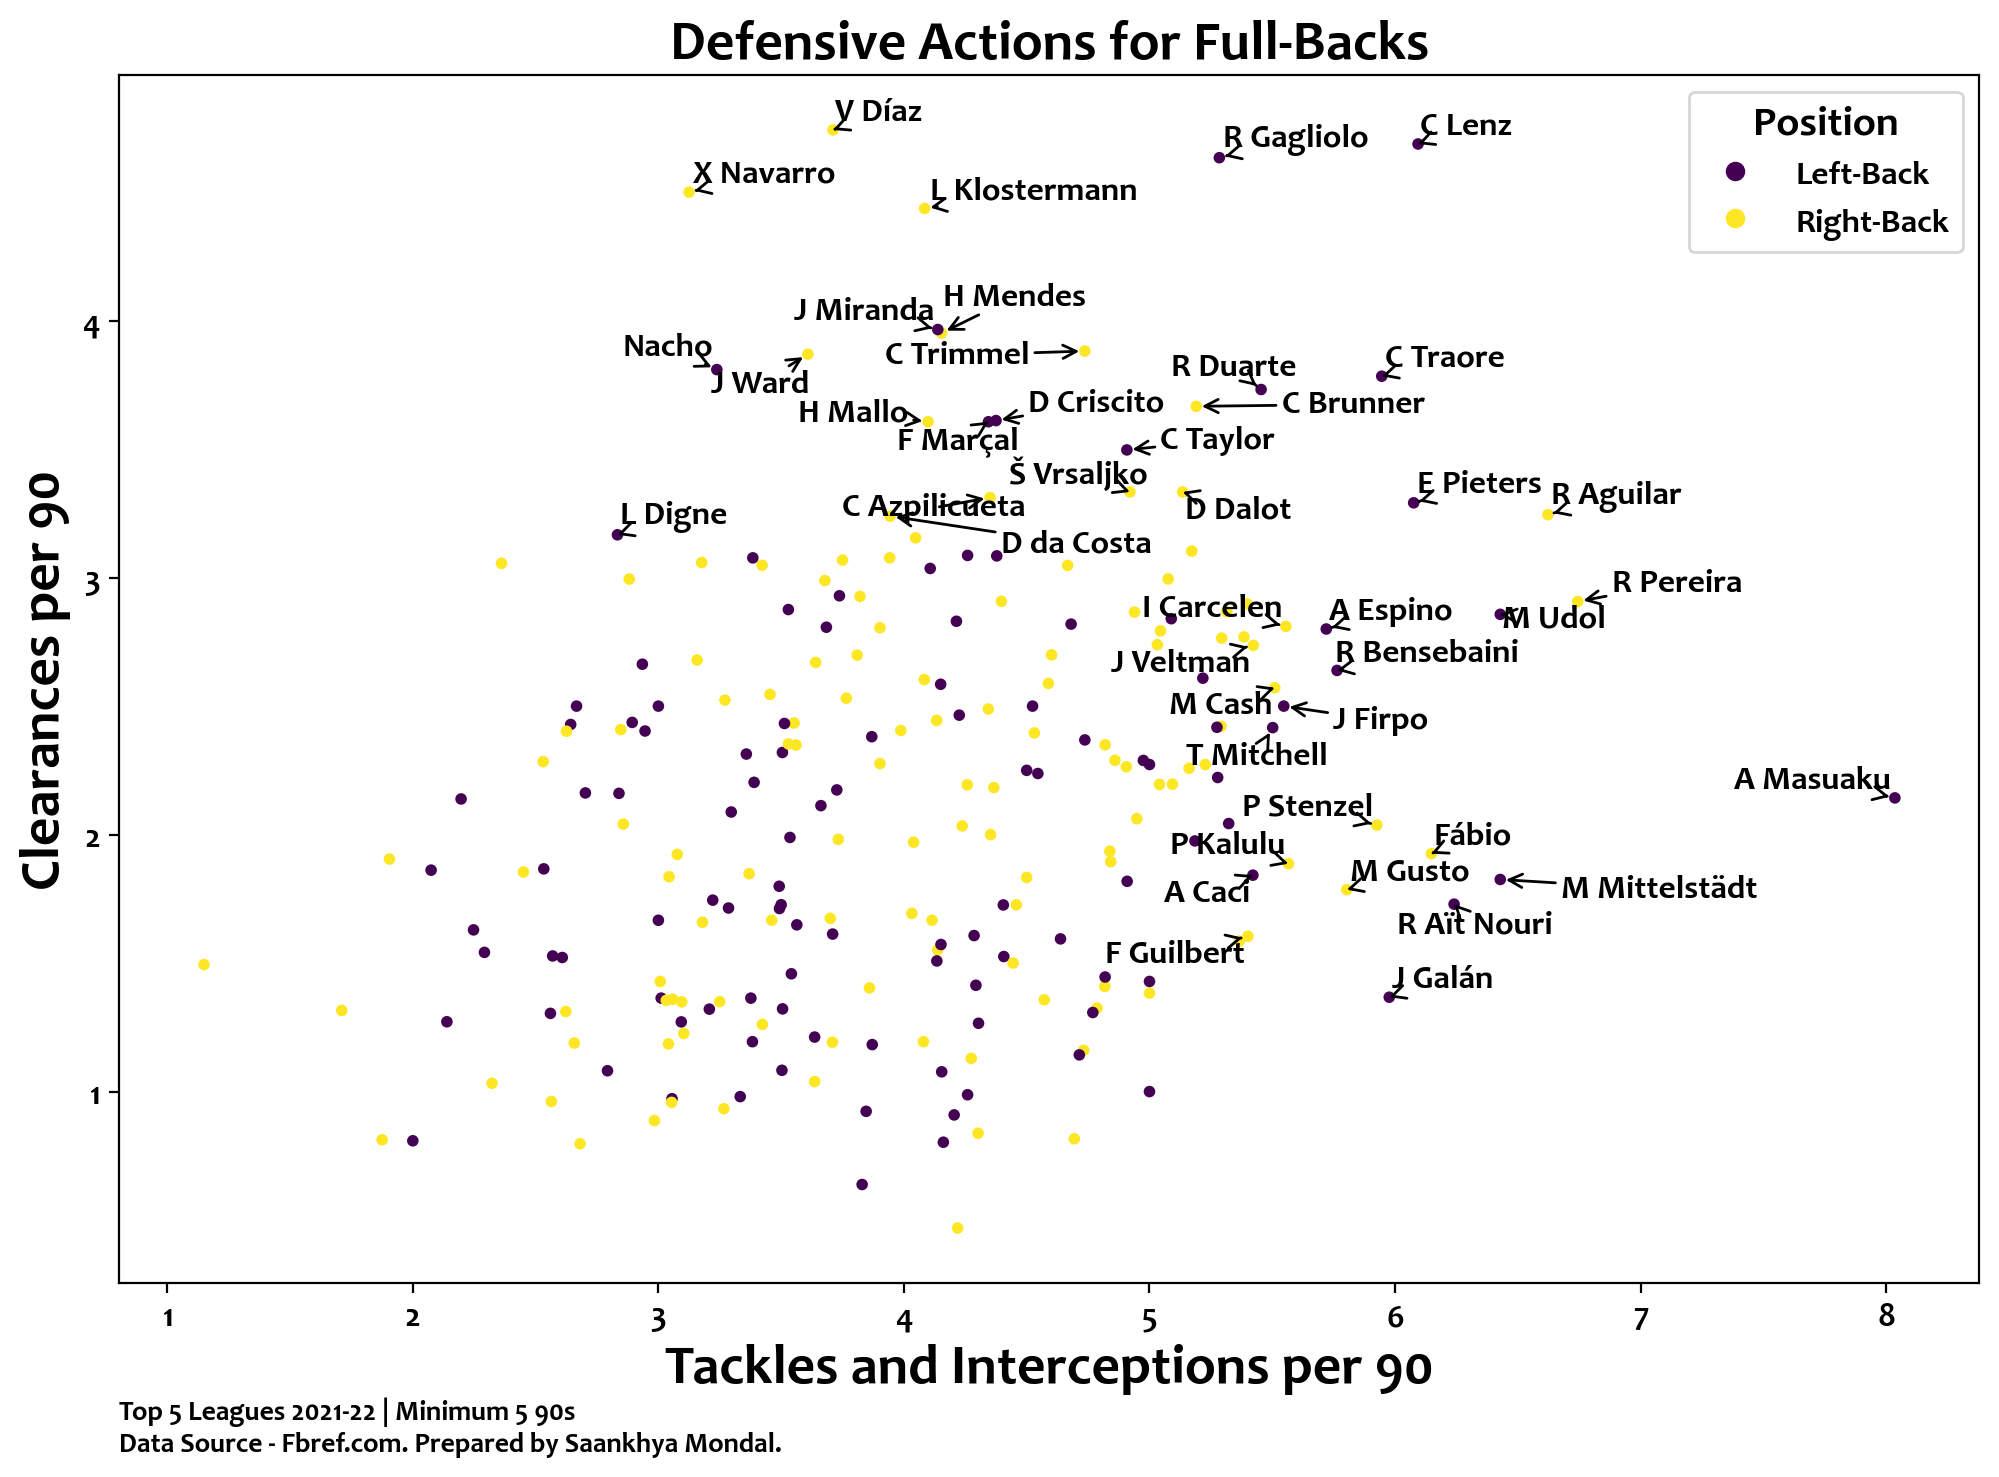

In [16]:
fig, ax = plt.subplots(figsize=(12, 8))
fig.set_dpi(200)
par_x = list(data['TAp90'])
par_y = list(data['Clrp90'])
col_codes = data.Position.astype('category').cat.codes
scatter = plt.scatter(par_x, par_y, c=col_codes, s=10)

outlier_top = data['Clrp90'].astype(float).quantile(0.90)
outlier_bottom = data['Clrp90'].astype(float).quantile(0.02)
outlier_right = data['TAp90'].astype(float).quantile(0.90)
outlier_left = data['TAp90'].astype(float).quantile(0.02)

txts = []
for i, txt in enumerate(list(data['Player'])):
    if par_x[i]>outlier_right or par_y[i]>outlier_top:
        if len(txt.split()) != 1:
            name = txt[0] + ' ' + ' '.join(txt.split()[1:])
        else:
            name = txt
        txts.append(plt.text(par_x[i], par_y[i], name))

adjust_text(txts, arrowprops=dict(arrowstyle='->', color='black'))
ax.set_xlabel('Tackles and Interceptions per 90', fontsize=20)
ax.set_ylabel('Clearances per 90', fontsize=20)
ax.set_title('Defensive Actions for Full-Backs', fontsize=20, fontdict={'weight':'heavy'})
ax.legend(handles=scatter.legend_elements()[0], labels=who, title="Position")
fig.text(0.125,0.04,'Top 5 Leagues 2021-22 | Minimum 5 90s', size = 10)
fig.text(0.125,0.02,'Data Source - Fbref.com. Prepared by Saankhya Mondal.', size=10)

In [17]:
fig.savefig('Images/DefensiveActions_FB.png', dpi=400, bbox_inches='tight')

In [18]:
data = data[data['90s']>=5.0]
who = ['Left-Back', 'Right-Back']
data = data[data['Position'].apply(lambda x : x in who)]
data

,S. No.,Player,Position,Nation,Pos,Squad,Comp,Age,Born,90s,...,xA,A-xA,KP,1/3,PPA,CrsPA,Prog,TAp90,Clrp90,Bp90
7,17,Marcos Acuña,Left-Back,ar ARG,DF,Sevilla,es La Liga,30-123,1991,17.4,...,2.3,0.7,30.0,68.0,31.0,17.0,85.0,3.505747,1.321839,1.149425
12,26,Martin Agirregabiria,Right-Back,es ESP,DF,Alavés,es La Liga,25-294,1996,16.2,...,0.9,0.1,13.0,42.0,18.0,10.0,51.0,3.765432,2.530864,1.666667
17,32,Ruben Aguilar,Right-Back,fr FRA,DF,Monaco,fr Ligue 1,28-308,1993,15.1,...,0.4,0.6,8.0,86.0,20.0,6.0,89.0,6.622517,3.245033,1.456954
21,39,Ola Aina,Right-Back,ng NGA,DF,Torino,it Serie A,25-143,1996,11.8,...,1.3,-1.3,13.0,34.0,18.0,5.0,49.0,4.237288,2.033898,1.694915
22,41,Rayan Aït Nouri,Left-Back,fr FRA,DF,Wolves,eng Premier League,20-267,2001,13.3,...,1.1,0.9,12.0,17.0,9.0,5.0,24.0,6.240602,1.729323,1.879699
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1833,2793,Joseba Zaldúa,Right-Back,es ESP,DF,Real Sociedad,es La Liga,29-249,1992,8.7,...,0.4,-0.4,4.0,17.0,10.0,3.0,23.0,3.678161,2.988506,2.068966
1837,2799,Gabriele Zappa,Right-Back,it ITA,DF,Cagliari,it Serie A,22-068,1999,11.1,...,0.9,-0.9,7.0,19.0,6.0,5.0,29.0,3.423423,1.261261,1.981982
1838,2800,Davide Zappacosta,Right-Back,it ITA,DF,Atalanta,it Serie A,29-262,1992,16.0,...,2.7,0.3,19.0,26.0,21.0,11.0,54.0,1.875,0.8125,2.1875
1841,2803,Deyovaisio Zeefuik,Right-Back,nl NED,"DF,MF",Hertha BSC,de Bundesliga,23-354,1998,6.3,...,0.4,-0.4,4.0,7.0,5.0,1.0,20.0,3.809524,2.698413,2.698413


In [19]:
data

,S. No.,Player,Position,Nation,Pos,Squad,Comp,Age,Born,90s,...,xA,A-xA,KP,1/3,PPA,CrsPA,Prog,TAp90,Clrp90,Bp90
7,17,Marcos Acuña,Left-Back,ar ARG,DF,Sevilla,es La Liga,30-123,1991,17.4,...,2.3,0.7,30.0,68.0,31.0,17.0,85.0,3.505747,1.321839,1.149425
12,26,Martin Agirregabiria,Right-Back,es ESP,DF,Alavés,es La Liga,25-294,1996,16.2,...,0.9,0.1,13.0,42.0,18.0,10.0,51.0,3.765432,2.530864,1.666667
17,32,Ruben Aguilar,Right-Back,fr FRA,DF,Monaco,fr Ligue 1,28-308,1993,15.1,...,0.4,0.6,8.0,86.0,20.0,6.0,89.0,6.622517,3.245033,1.456954
21,39,Ola Aina,Right-Back,ng NGA,DF,Torino,it Serie A,25-143,1996,11.8,...,1.3,-1.3,13.0,34.0,18.0,5.0,49.0,4.237288,2.033898,1.694915
22,41,Rayan Aït Nouri,Left-Back,fr FRA,DF,Wolves,eng Premier League,20-267,2001,13.3,...,1.1,0.9,12.0,17.0,9.0,5.0,24.0,6.240602,1.729323,1.879699
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1833,2793,Joseba Zaldúa,Right-Back,es ESP,DF,Real Sociedad,es La Liga,29-249,1992,8.7,...,0.4,-0.4,4.0,17.0,10.0,3.0,23.0,3.678161,2.988506,2.068966
1837,2799,Gabriele Zappa,Right-Back,it ITA,DF,Cagliari,it Serie A,22-068,1999,11.1,...,0.9,-0.9,7.0,19.0,6.0,5.0,29.0,3.423423,1.261261,1.981982
1838,2800,Davide Zappacosta,Right-Back,it ITA,DF,Atalanta,it Serie A,29-262,1992,16.0,...,2.7,0.3,19.0,26.0,21.0,11.0,54.0,1.875,0.8125,2.1875
1841,2803,Deyovaisio Zeefuik,Right-Back,nl NED,"DF,MF",Hertha BSC,de Bundesliga,23-354,1998,6.3,...,0.4,-0.4,4.0,7.0,5.0,1.0,20.0,3.809524,2.698413,2.698413


In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 240 entries, 7 to 1848
Data columns (total 75 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   S. No.     240 non-null    int64 
 1   Player     240 non-null    object
 2   Position   240 non-null    object
 3   Nation     240 non-null    object
 4   Pos        240 non-null    object
 5   Squad      240 non-null    object
 6   Comp       240 non-null    object
 7   Age        240 non-null    object
 8   Born       240 non-null    object
 9   90s        240 non-null    object
 10  Tkl        240 non-null    object
 11  TklW       240 non-null    object
 12  Def 3rd    240 non-null    object
 13  Mid 3rd    240 non-null    object
 14  Att 3rd    240 non-null    object
 15  Tkl.1      240 non-null    object
 16  Att_x      240 non-null    object
 17  Tkl%       240 non-null    object
 18  Past       240 non-null    object
 19  Press      240 non-null    object
 20  Succ       240 non-null    obje

In [21]:
new_data = data[['Player', '90s', 'Tkl', 'TklW', 'Past', 'Press', 'Succ', 'Blocks', 'Int', 'Clr', 'Gls', 'Sh_y', 'SoT', 'xG', 'PrgDist', 'Ast', 'xA', 'KP', '1/3', 'PPA', 'CrsPA', 'Prog']]
new_data.iloc[:, 2:] = new_data.iloc[:, 2:].div(new_data['90s'], axis=0)
new_data.drop(columns=['90s'], inplace=True)
new_data = new_data.drop_duplicates(subset='Player')
new_data

C:\Users\SAANKHYA\anaconda3\envs\torch1.7\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
C:\Users\SAANKHYA\anaconda3\envs\torch1.7\lib\site-packages\pandas\core\indexing.py:723: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value, self.name)
C:\Users\SAANKHYA\anaconda3\envs\torch1.7\lib\site-packages\pandas\core\frame.py:4908: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-do

,Player,Tkl,TklW,Past,Press,Succ,Blocks,Int,Clr,Gls,...,SoT,xG,PrgDist,Ast,xA,KP,1/3,PPA,CrsPA,Prog
7,Marcos Acuña,2.241379,1.37931,0.344828,9.712644,3.103448,1.149425,1.264368,1.321839,0.057471,...,0.229885,0.074713,453.735632,0.172414,0.132184,1.724138,3.908046,1.781609,0.977011,4.885057
12,Martin Agirregabiria,2.345679,1.17284,1.049383,11.851852,3.271605,1.666667,1.419753,2.530864,0.0,...,0.0,0.006173,304.567901,0.061728,0.055556,0.802469,2.592593,1.111111,0.617284,3.148148
17,Ruben Aguilar,4.10596,2.384106,1.258278,16.887417,5.960265,1.456954,2.516556,3.245033,0.0,...,0.066225,0.006623,419.403974,0.066225,0.02649,0.529801,5.695364,1.324503,0.397351,5.89404
21,Ola Aina,1.949153,1.016949,0.59322,10.59322,3.898305,1.694915,2.288136,2.033898,0.0,...,0.169492,0.016949,255.59322,0.0,0.110169,1.101695,2.881356,1.525424,0.423729,4.152542
22,Rayan Aït Nouri,4.285714,2.255639,0.977444,21.879699,6.992481,1.879699,1.954887,1.729323,0.0,...,0.150376,0.030075,216.240602,0.150376,0.082707,0.902256,1.278195,0.676692,0.37594,1.804511
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1833,Joseba Zaldúa,2.528736,1.609195,0.574713,11.37931,2.643678,2.068966,1.149425,2.988506,0.0,...,0.114943,0.0,289.54023,0.0,0.045977,0.45977,1.954023,1.149425,0.344828,2.643678
1837,Gabriele Zappa,1.261261,0.720721,0.900901,17.747748,4.504505,1.981982,2.162162,1.261261,0.0,...,0.18018,0.036036,301.981982,0.0,0.081081,0.630631,1.711712,0.540541,0.45045,2.612613
1838,Davide Zappacosta,1.125,0.4375,0.5625,16.125,3.6875,2.1875,0.75,0.8125,0.0625,...,0.25,0.1,247.0,0.1875,0.16875,1.1875,1.625,1.3125,0.6875,3.375
1841,Deyovaisio Zeefuik,1.904762,1.111111,0.793651,14.761905,4.444444,2.698413,1.904762,2.698413,0.0,...,0.0,0.0,169.206349,0.0,0.063492,0.634921,1.111111,0.793651,0.15873,3.174603


In [22]:
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.manifold import TSNE

In [23]:
x = new_data.iloc[:, 1:].astype(float)

In [24]:
x = np.array(x)
x = (x - np.mean(x, axis=0))/np.std(x, axis=0)

In [25]:
n_cluster = 2
kmeans = KMeans(n_clusters=n_cluster, max_iter=10000).fit(x)
gmm = GaussianMixture(n_components=n_cluster, max_iter=10000).fit(x)

In [26]:
y_km = kmeans.labels_
y_km

array([0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0,
       1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0])

In [27]:
y_gmm = gmm.predict(x)
y_gmm

array([0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1],
      dtype=int64)

In [28]:
tsne = TSNE(n_components=2, verbose=1, perplexity=45, n_iter=5000, learning_rate=200)
z = tsne.fit_transform(x)

[t-SNE] Computing 136 nearest neighbors...
[t-SNE] Indexed 240 samples in 0.000s...
[t-SNE] Computed neighbors for 240 samples in 0.005s...
[t-SNE] Computed conditional probabilities for sample 240 / 240
[t-SNE] Mean sigma: 1.919589
[t-SNE] KL divergence after 250 iterations with early exaggeration: 59.823284
[t-SNE] KL divergence after 1900 iterations: 0.698628


In [29]:
data = pd.DataFrame()
data['Player'] = new_data['Player']
data['y_km'] = y_km
data['y_gmm'] = y_gmm
data["Component-1"] = z[:,0]
data["Component-2"] = z[:,1]

In [30]:
data

,Player,y_km,y_gmm,Component-1,Component-2
7,Marcos Acuña,0,0,-0.454424,0.047502
12,Martin Agirregabiria,1,0,-1.922369,-7.608889
17,Ruben Aguilar,1,0,2.407586,-8.370811
21,Ola Aina,1,1,-2.572844,-4.362414
22,Rayan Aït Nouri,1,0,4.231528,-10.527618
...,...,...,...,...,...
1833,Joseba Zaldúa,1,0,-2.540894,-8.566146
1837,Gabriele Zappa,1,0,-2.229445,-6.413390
1838,Davide Zappacosta,0,0,-3.077506,-0.747545
1841,Deyovaisio Zeefuik,1,0,-1.276252,-10.851514


Text(0.125, 0.02, 'Data Source - Fbref.com. Prepared by Saankhya Mondal.')

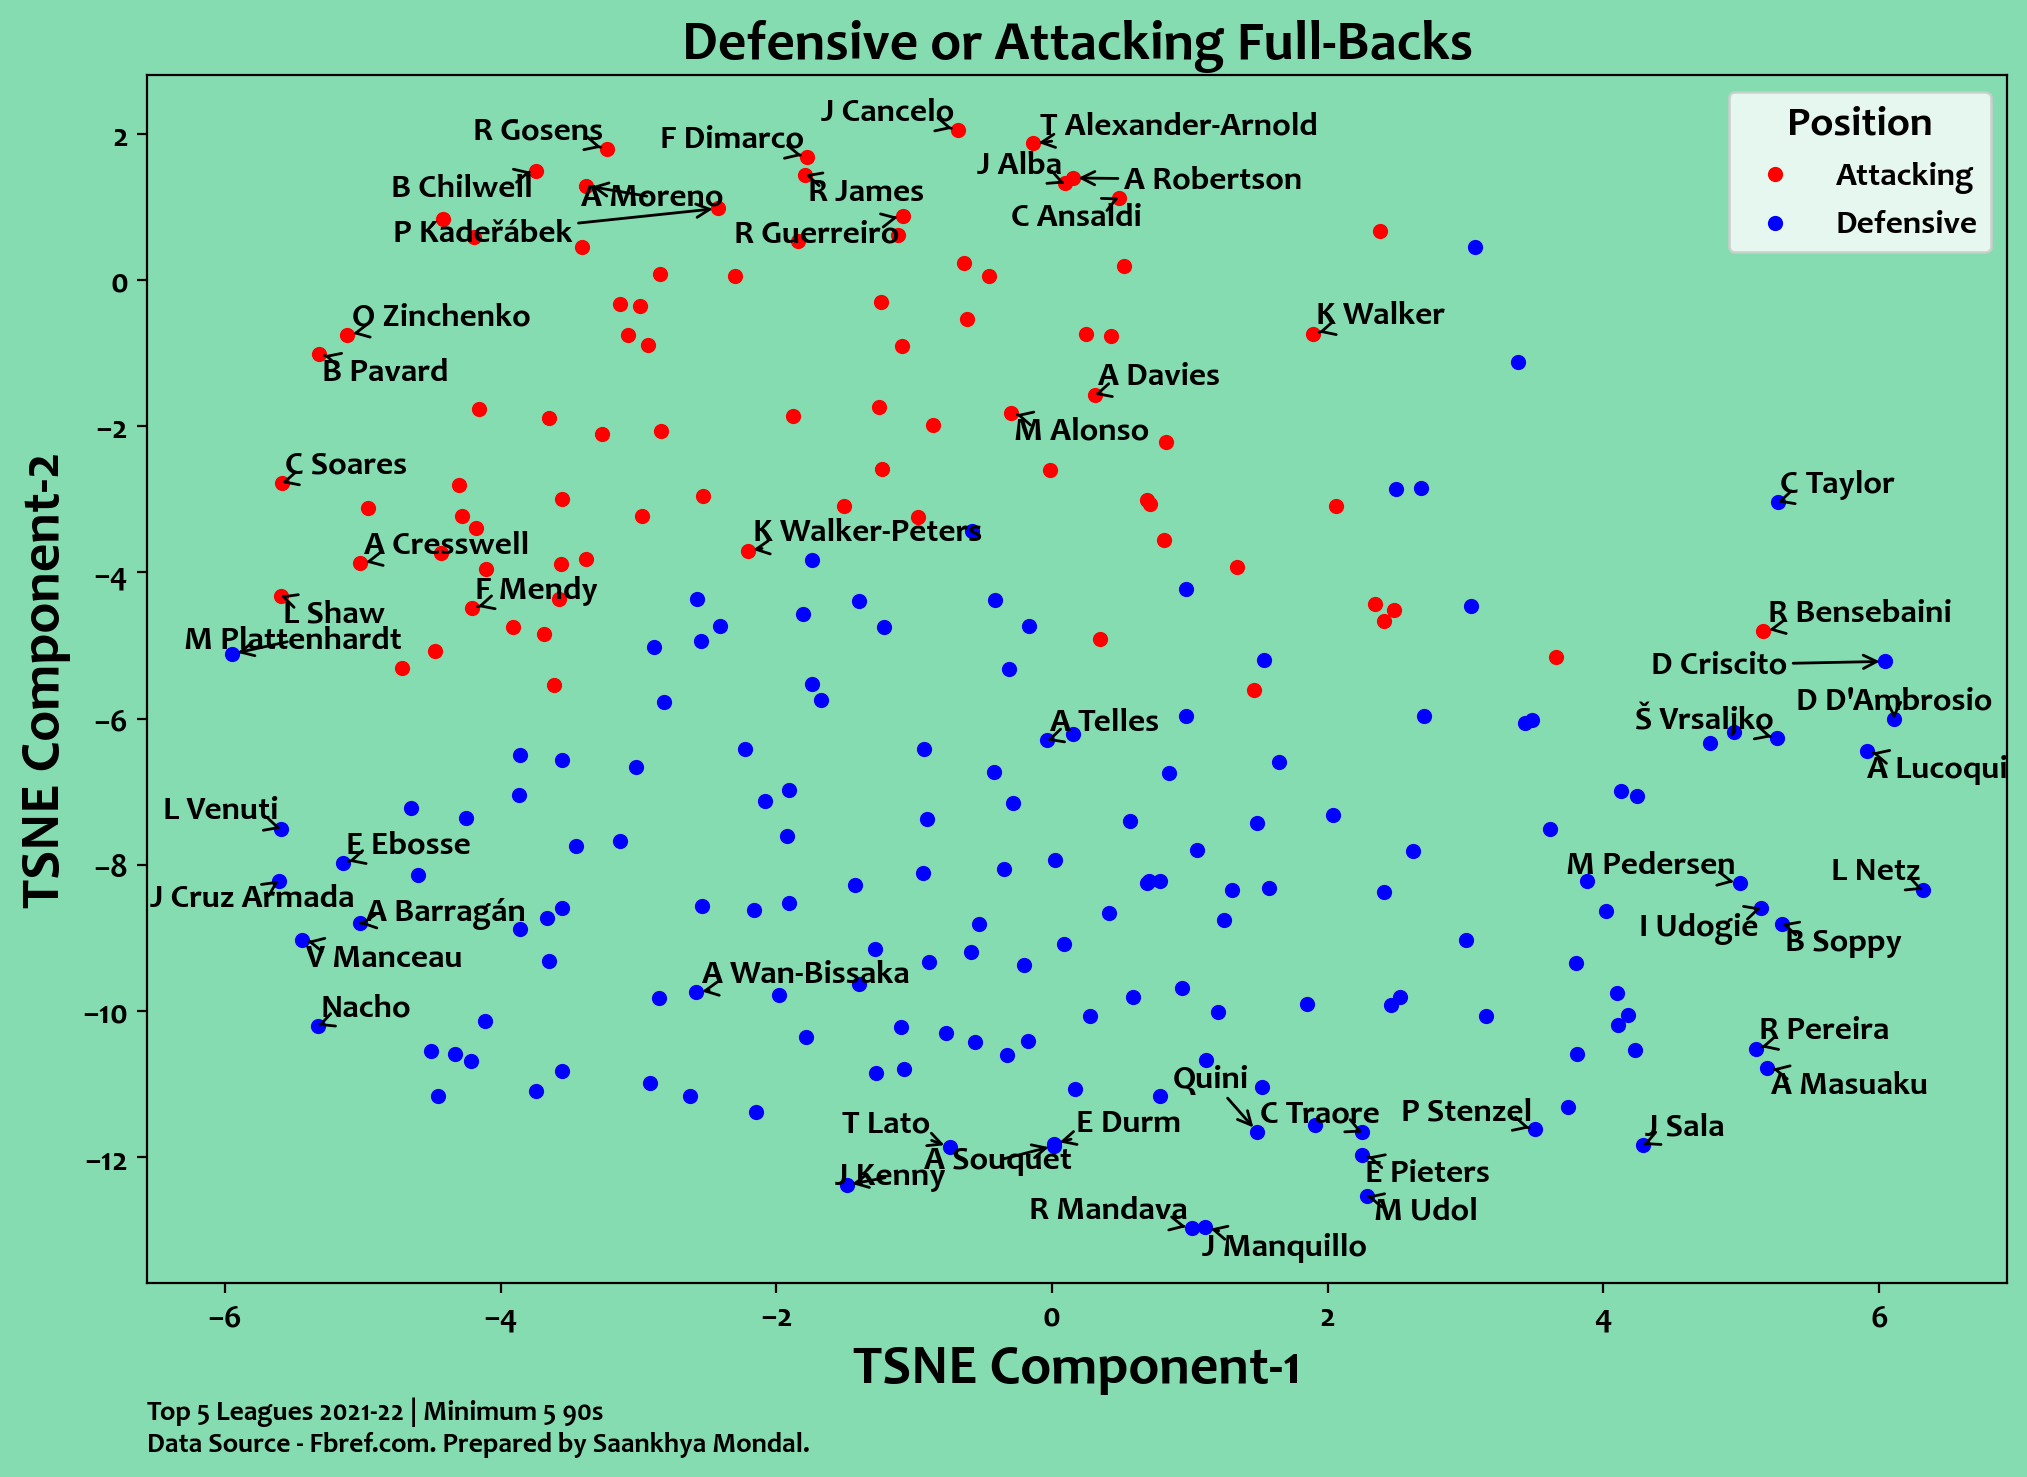

In [31]:
fig, ax = plt.subplots(figsize=(12, 8))
fig.set_dpi(200)
ax.set_facecolor('#85dcb0')
fig.set_facecolor('#85dcb0')
fig.set_edgecolor('#85dcb0')
par_x = list(data['Component-1'])
par_y = list(data['Component-2'])
colors = {0:'red', 1:'blue'}
grouped = data.groupby('y_km')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='Component-1', y='Component-2', label=key, color=colors[key])

outlier_top = data['Component-2'].astype(float).quantile(0.95)
outlier_bottom = data['Component-2'].astype(float).quantile(0.05)
outlier_right = data['Component-1'].astype(float).quantile(0.95)
outlier_left = data['Component-1'].astype(float).quantile(0.05)

fbs = ['Walker', 'Alba', 'Zinchenko', 'Mendy', 'Alonso', 'Robertson', 'Trent', 'Reece', 'Wan-Bissaka', 'Shaw', 'Telles', 'Alphonso']

def check_name_present(name):
    for i in fbs:
        if i in name:
            return True
    return False

txts = []
for i, txt in enumerate(list(data['Player'])):
    if par_x[i]>outlier_right or par_x[i]<outlier_left or par_y[i]>outlier_top or par_y[i]<outlier_bottom or check_name_present(txt):
        if len(txt.split()) != 1:
            name = txt[0] + ' ' + ' '.join(txt.split()[1:])
        else:
            name = txt
        txts.append(plt.text(par_x[i], par_y[i], name))

adjust_text(txts, arrowprops=dict(arrowstyle='->', color='black'))
ax.set_xlabel('TSNE Component-1', fontsize=20)
ax.set_ylabel('TSNE Component-2', fontsize=20)
ax.set_title('Defensive or Attacking Full-Backs', fontsize=20, fontdict={'weight':'heavy'})
ax.legend(labels=['Attacking', 'Defensive'], title="Position")
fig.text(0.125,0.04,'Top 5 Leagues 2021-22 | Minimum 5 90s', size = 10)
fig.text(0.125,0.02,'Data Source - Fbref.com. Prepared by Saankhya Mondal.', size=10)

In [32]:
fig.savefig('Images/TSNE-Viz-K-Means-Cluster_FB.png', dpi=1000, bbox_inches='tight', facecolor=fig.get_facecolor())

Text(0.125, 0.02, 'Data Source - Fbref.com. Prepared by Saankhya Mondal.')

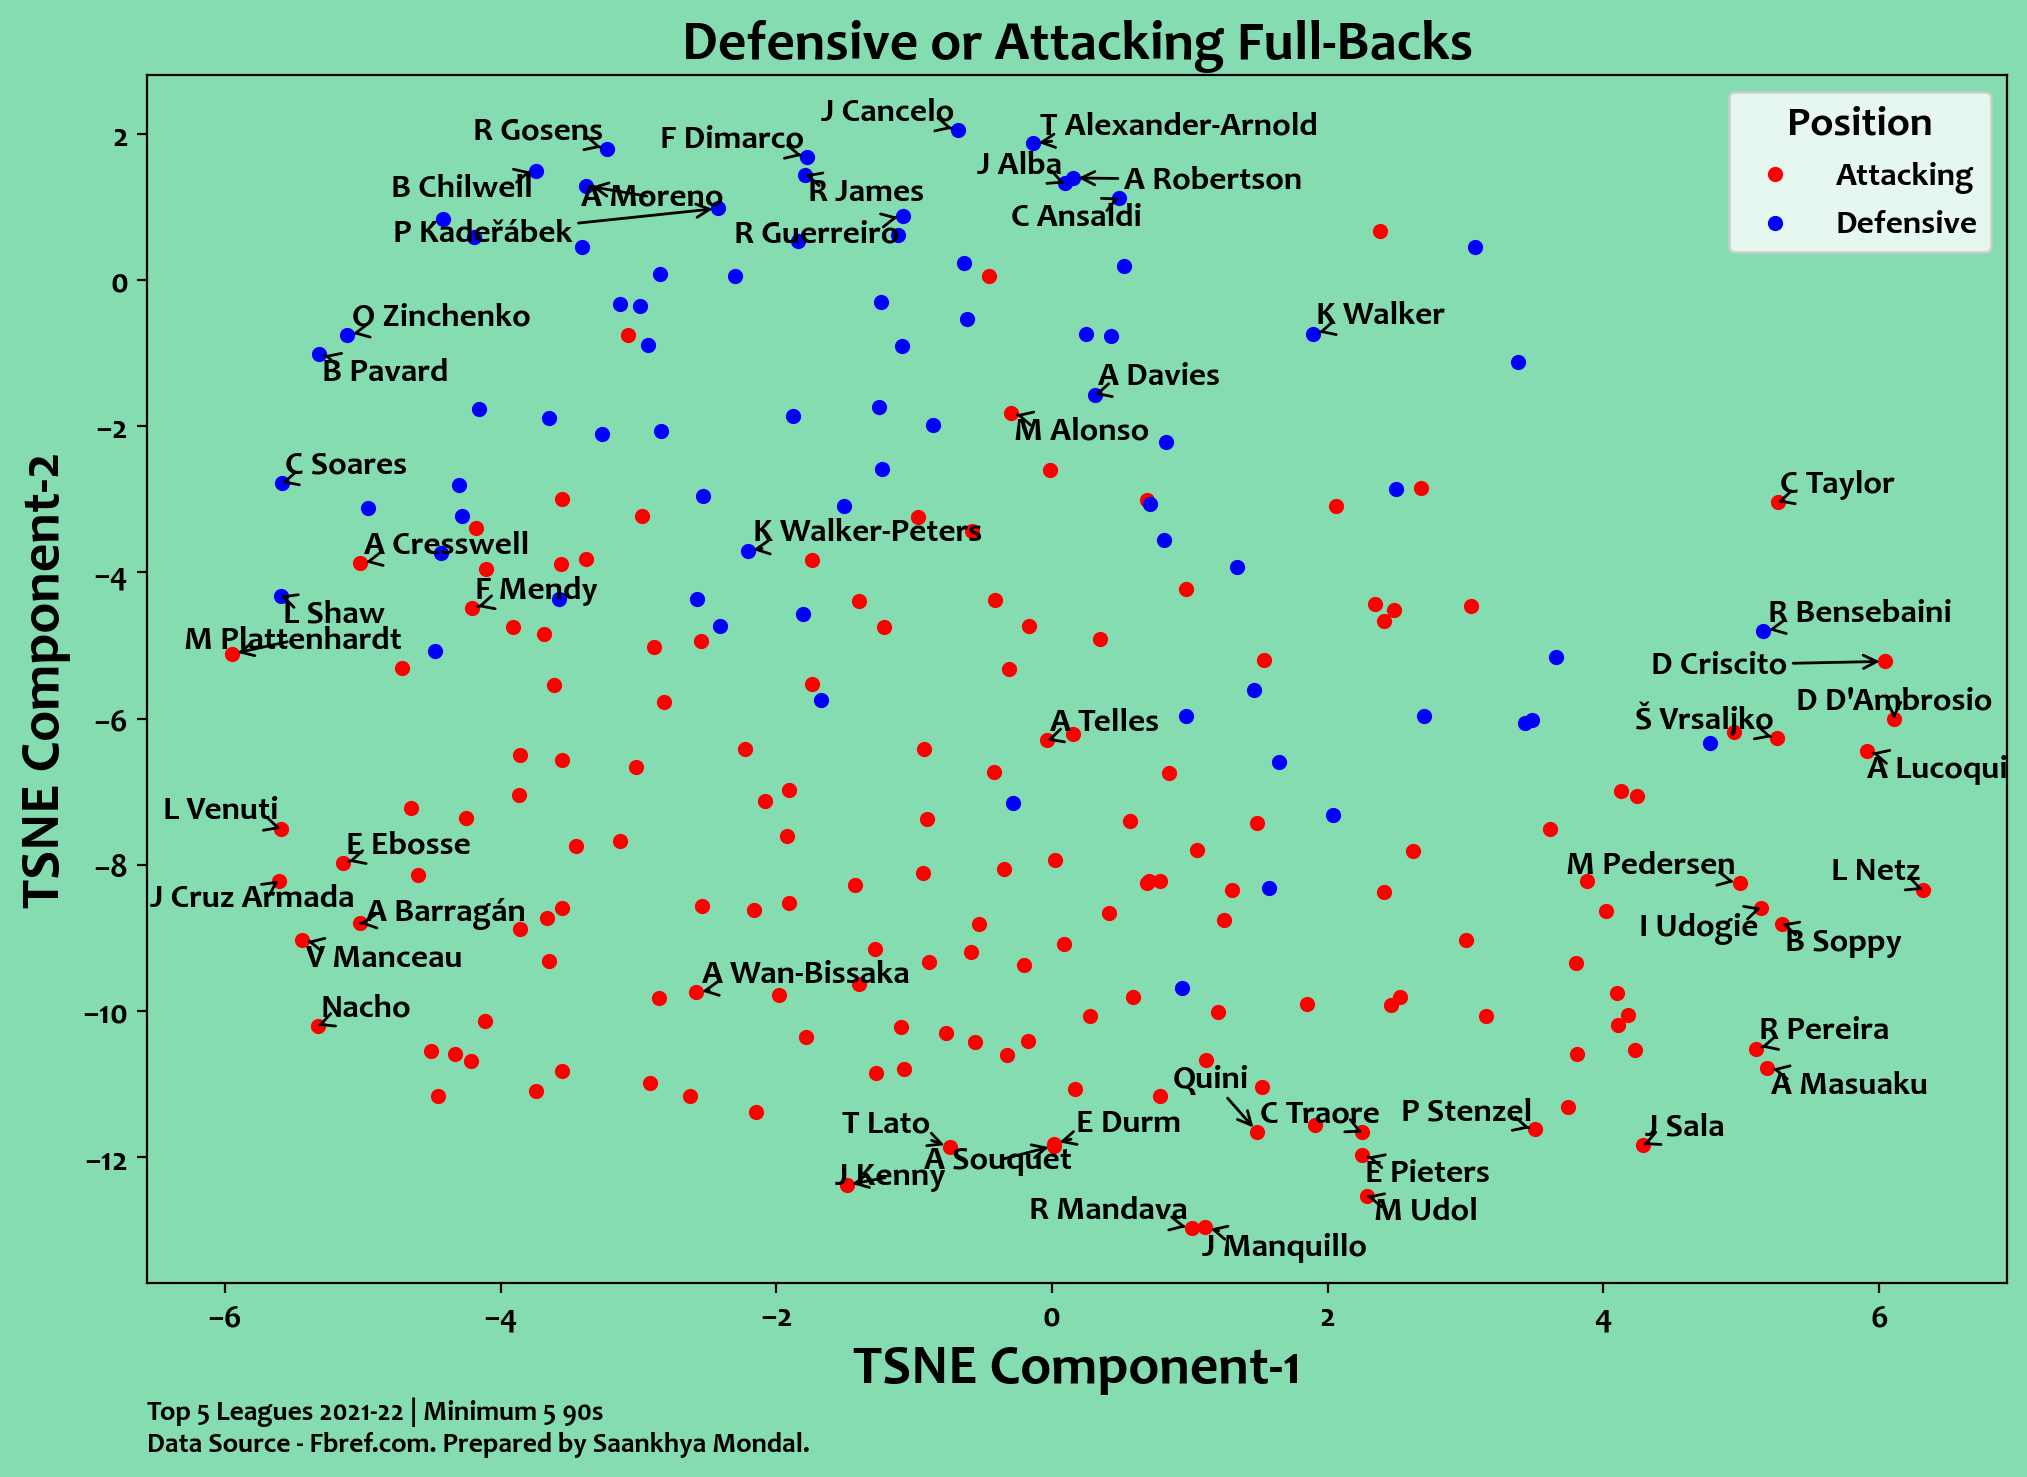

In [33]:
fig, ax = plt.subplots(figsize=(12, 8))
fig.set_dpi(200)
ax.set_facecolor('#85dcb0')
fig.set_facecolor('#85dcb0')
fig.set_edgecolor('#85dcb0')
par_x = list(data['Component-1'])
par_y = list(data['Component-2'])
colors = {0:'red', 1:'blue'}
grouped = data.groupby('y_gmm')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='Component-1', y='Component-2', label=key, color=colors[key])


outlier_top = data['Component-2'].astype(float).quantile(0.95)
outlier_bottom = data['Component-2'].astype(float).quantile(0.05)
outlier_right = data['Component-1'].astype(float).quantile(0.95)
outlier_left = data['Component-1'].astype(float).quantile(0.05)

fbs = ['Walker', 'Alba', 'Zinchenko', 'Mendy', 'Alonso', 'Robertson', 'Trent', 'Reece', 'Wan-Bissaka', 'Shaw', 'Telles', 'Alphonso']

def check_name_present(name):
    for i in fbs:
        if i in name:
            return True
    return False

txts = []
for i, txt in enumerate(list(data['Player'])):
    if par_x[i]>outlier_right or par_x[i]<outlier_left or par_y[i]>outlier_top or par_y[i]<outlier_bottom or check_name_present(txt):
        if len(txt.split()) != 1:
            name = txt[0] + ' ' + ' '.join(txt.split()[1:])
        else:
            name = txt
        txts.append(plt.text(par_x[i], par_y[i], name))

adjust_text(txts, arrowprops=dict(arrowstyle='->', color='black'))
ax.set_xlabel('TSNE Component-1', fontsize=20)
ax.set_ylabel('TSNE Component-2', fontsize=20)
ax.set_title('Defensive or Attacking Full-Backs', fontsize=20, fontdict={'weight':'heavy'})
ax.legend(labels=['Attacking', 'Defensive'], title="Position")
fig.text(0.125,0.04,'Top 5 Leagues 2021-22 | Minimum 5 90s', size = 10)
fig.text(0.125,0.02,'Data Source - Fbref.com. Prepared by Saankhya Mondal.', size=10)

In [34]:
fig.savefig('Images/TSNE-Viz-GMM-Cluster_FB.png', dpi=1000, bbox_inches='tight', facecolor=fig.get_facecolor())